### Evolving Network Analysis - January 2018
#### <i>Abdel K. Bokharouss, Joris Rombouts, Bart van Helvert, Remco Surtel</i>

#### Imports, preparation, and creating the graph

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
with open("./data/tgraph_real_wikiedithyperlinks.txt") as file:
    peek = file.readlines()[:10]
peek

['1 6 1028243088 1120917090\n',
 '1 8 1029885647 1136791625\n',
 '1 9 1029885647 1136791625\n',
 '1 3 1028243088 1143227562\n',
 '1 3 1146727453 1148998304\n',
 '1 5 1028243088 1184096745\n',
 '1 2 1028243088 1184096745\n',
 '1 3 1149598035 1184096745\n',
 '1 4 1028243088 1184096745\n',
 '1 7 1028243088 1184096745\n']

In [3]:
# Create a dataframe from the given textfile. This dataframe will be used to create a static graph G.
df_G = pd.read_table("./Data/tgraph_real_wikiedithyperlinks.txt", header = None, sep = " ",
                       names = ["src", "trg", "start", "end"])

In [4]:
df_G.head()

,src,trg,start,end
0,1,6,1028243088,1120917090
1,1,8,1029885647,1136791625
2,1,9,1029885647,1136791625
3,1,3,1028243088,1143227562
4,1,3,1146727453,1148998304


In [5]:
# Initialize a static directed graph G from the given pandas dataframe.
G = nx.from_pandas_dataframe(df_G, 'src', 'trg', edge_attr=None, create_using=nx.DiGraph())

## Assortativity

In [6]:
# Run the Assortativity algorithm from networkx. Because G is a directed graph, we must specify the degree types for source (x) 
# and target (y) nodes.
# Returns float; Assortativity of graph by degree.
assortativity = nx.degree_assortativity_coefficient(G, x='out', y='in')

In [7]:
print(assortativity)

-0.0793569754539


In [9]:
# Save the value, so we don't have to run the algorithm again.
r = -0.0793569754539

Positive values of the assortativity coefficient $r$ indicate a correlation between nodes of similar degree, while negative values indicate relationships between nodes of different degree. In general, $r$ lies between -1 and 1. When $r=1$, the network is said to have perfect assortative mixing patterns, when $r=0$ the network is non-assortative, while at $r=-1$ the network is completely disassortative. 

Our value, $r \approx -0.08$, indicates that the graph $G$ is mostly non-assortative. In other words, there is no indication that nodes with a high degree are more likely to be linked to other nodes with a high degree. Furthermore, there is also no indication that nodes with a low degree are more likely to be linked to nodes with a high degree. The edges between nodes do not appear to be correlated to the degrees of the nodes in any way.

In [10]:
# Run the average neighbour degree algorithm from networkx. 
# Returns dict; A dictionary keyed by node with average neighbours degree value.
d = nx.average_neighbor_degree(G, source='out', target='in')

In [26]:
df_neighbours = pd.DataFrame.from_dict(d, orient='index')
df_neighbours.columns = ['Avg neighbour degree']
df_neighbours['Node'] = df_neighbours.index
cols = df_neighbours.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_neighbours = df_neighbours[cols]
df_neighbours.head()

,Node,Avg neighbour degree
1,1,481.329545
6,6,0.000000
8,8,225.666667
9,9,415.872117
3,3,306.179601


In [27]:
degree = list()
nodes = df_neighbours.index
for node in nodes:
    deg = G.degree(node)
    degree.append(deg)
df_neighbours['Degree'] = degree
df_neighbours.head()

,Node,Avg neighbour degree,Degree
1,1,481.329545,116
6,6,0.000000,10
8,8,225.666667,68
9,9,415.872117,1852
3,3,306.179601,1519


Now we have a dataframe containing for every node the degree of the node itself, and the average degree of its neighbours. Let's plot this and see what we can find.

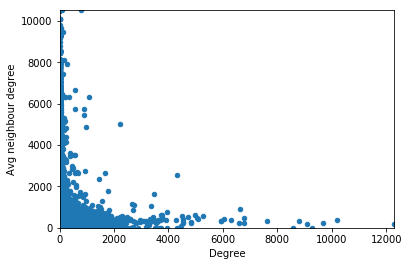

In [30]:
df_neighbours.plot(kind='scatter', x='Degree', y='Avg neighbour degree', s=20)
plt.xlim(0, df_neighbours['Degree'].max())
plt.ylim(0, df_neighbours['Avg neighbour degree'].max())
plt.show()

Here we can see that most nodes have a low degree, that's why nodes are mostly in the bottom-left of the graph. However, we can also see that, of the few nodes that do have a high degree, their average neighbour still has a low degree (shown by the nodes scattered along the X-axis). Also, nodes with a low degree can still be linked to nodes that have a high degree (shown by the nodes scattered along the Y-axis). If the graph was assortative, we would expect a line through $y=x$, and if the graph was disassortative, we would expect a line through $y=-x$. This plot, however, shows that the graph $G$ is indeed non-assortative, as the assortativity coefficient predicted.

To link this back to the subject of this exercise, the wiki page, let's say that a link is added from a wiki page $page 1$ to another wiki page, $page 2$. Then, because our network is non-assortative, we cannot say anything about what the degree of $page 2$ is likely to be, in terms of the degree of $page 1$.

For instance, if we assume that the network was assortative, and we know that $page 1$ has a high degree (i.e. it links to many other pages), then we could say that it is likely that $page 2$ also has a high degree. Or, if the network was disassortative, we could say that it is likely for $page 2$ to have a low degree. However, because our network is non-assortative, we cannot make any useful conclusions. 

This property is likely caused by the fact that wiki pages are linked to solely based on their content, and not based on any additional properties, like their degree. For example, if a wiki page is being written about temporal network analysis, the writer will likely link to a wiki page explaining what a temporal network is so that he does not have to add duplicate information, regardless of how many links this wiki page might contain.